In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [90]:
friteuse_fish = pd.read_csv("Processed_Energy_data/Processed_Friteuse_fish.csv")
friteuse_frites_1 = pd.read_csv("Processed_Energy_data/Processed_Friteuse_frites_1.csv")
friteuse_frites_2 = pd.read_csv("Processed_Energy_data/Processed_Friteuse_frites_2.csv")
friteuse_frites_3 = pd.read_csv("Processed_Energy_data/Processed_Friteuse_frites_3.csv")
friteuse_hp_poulet_1 = pd.read_csv("Processed_Energy_data/Processed_Friteuse_HP_poulet_1.csv")
friteuse_hp_poulet_2 = pd.read_csv("Processed_Energy_data/Processed_Friteuse_HP_poulet_2.csv")
friteuse_poulet_3 = pd.read_csv("Processed_Energy_data/Processed_Friteuse_poulet_3.csv")
friteuse_poulet_4 = pd.read_csv("Processed_Energy_data/Processed_Friteuse_poulet_4.csv")
friteuse_poulet_5 = pd.read_csv("Processed_Energy_data/Processed_Friteuse_poulet_5.csv")

In [31]:
friteuse_fish

,Date,Time,Energy,working
0,2023-04-29,10:33:00,26.91,0
1,2023-04-29,10:34:00,95.45,0
2,2023-04-29,10:35:00,27.83,0
3,2023-04-29,10:36:00,74.75,0
4,2023-04-29,10:37:00,28.29,0
...,...,...,...,...
516047,2024-04-29,10:27:00,31.51,0
516048,2024-04-29,10:28:00,4570.10,0
516049,2024-04-29,10:29:00,31.97,0
516050,2024-04-29,10:30:00,30.82,0


/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/1370157389.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/1370157389.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times = pd.to_datetime(minute_by_minute.index.astype(str))


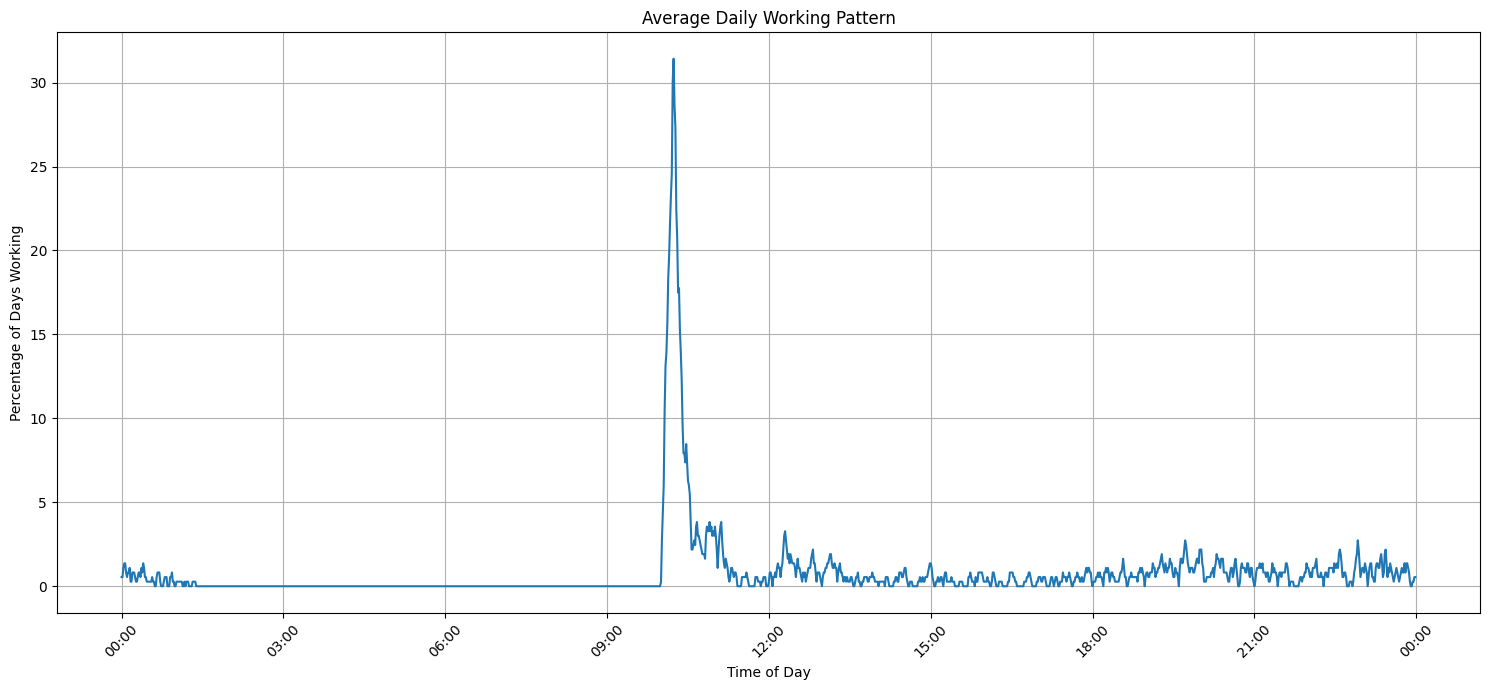

In [12]:
data = friteuse_fish
data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.set_index('datetime', inplace=True)
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Extract only the 'working' column, resample to every minute if needed
data_resampled = data['working'].resample('T').max().fillna(0)

# Group by each day, and create a minute-by-minute pattern
minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()

times = pd.to_datetime(minute_by_minute.index.astype(str))

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(times, minute_by_minute.values * 100, label='Percentage Working')
plt.title('Average Daily Working Pattern')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Days Working')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the x-axis to show time only
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
friteuse = [friteuse_frites_1,friteuse_frites_2,friteuse_frites_3]
minute_f = np.zeros((3, 1440))  # Assuming there are 1440 minutes in a day

for i in range(3):
    data = friteuse[i]
    data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('datetime', inplace=True)
    data.drop(['Date', 'Time'], axis=1, inplace=True)
    
    # Extract only the 'working' column, resample to every minute if needed
    data_resampled = data['working'].resample('T').max().fillna(0)
    
    # Group by each day, and create a minute-by-minute pattern
    minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()
    minute_f[i, :] = minute_by_minute.values
        
minute_summary = minute_f.sum(axis=0)
times = pd.to_datetime(minute_by_minute.index.astype(str))



/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2996705223.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2996705223.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2996705223.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2996705223.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify

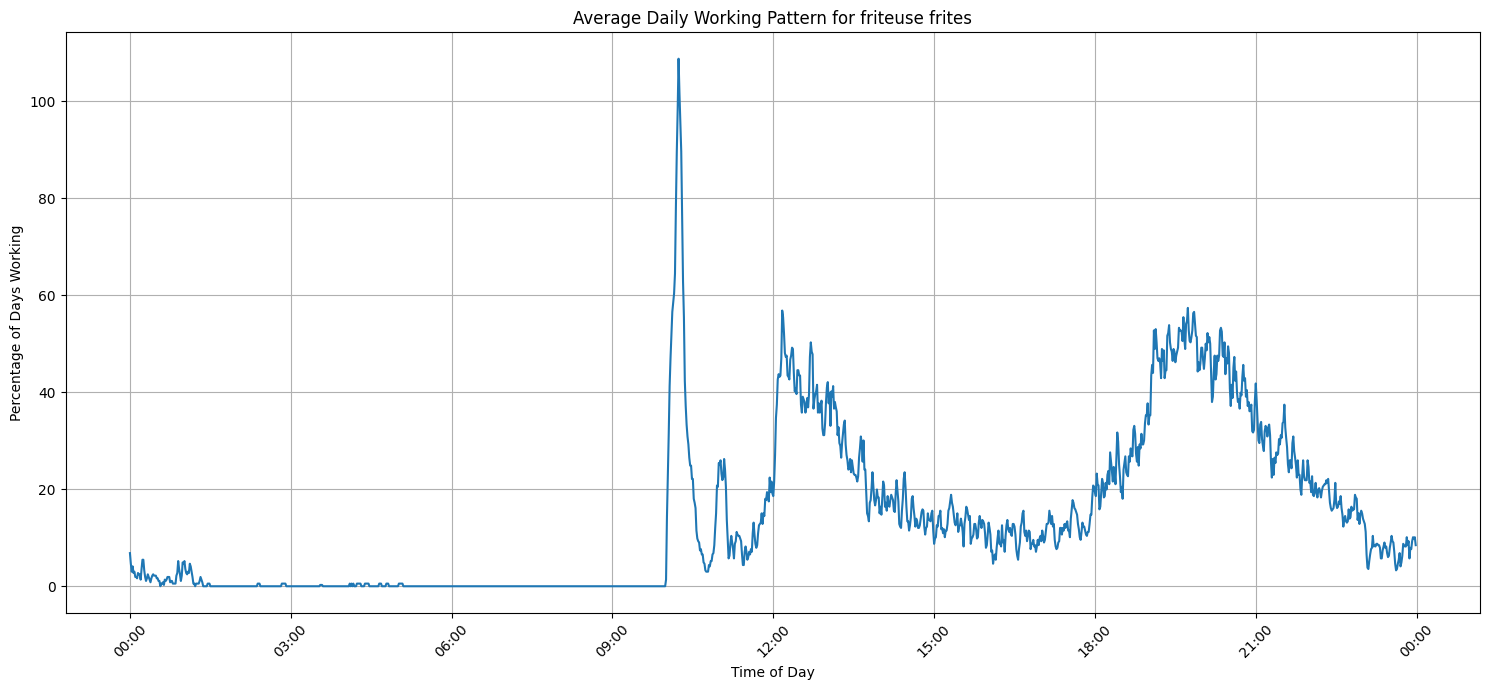

In [22]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot(times, minute_summary * 100, label='Percentage Working')
plt.title('Average Daily Working Pattern for friteuse frites')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Days Working')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the x-axis to show time only
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
hp_poulet = [friteuse_hp_poulet_1,friteuse_hp_poulet_2]
minute_h = np.zeros((3, 1440))  # Assuming there are 1440 minutes in a day

for i in range(2):
    data = hp_poulet[i]
    data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('datetime', inplace=True)
    data.drop(['Date', 'Time'], axis=1, inplace=True)
    
    # Extract only the 'working' column, resample to every minute if needed
    data_resampled = data['working'].resample('T').max().fillna(0)
    
    # Group by each day, and create a minute-by-minute pattern
    minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()
    minute_h[i, :] = minute_by_minute.values
        
minute_summary = minute_h.sum(axis=0)
times = pd.to_datetime(minute_by_minute.index.astype(str))



/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2074974721.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2074974721.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2074974721.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times = pd.to_datetime(minute_by_minute.index.astype(str))


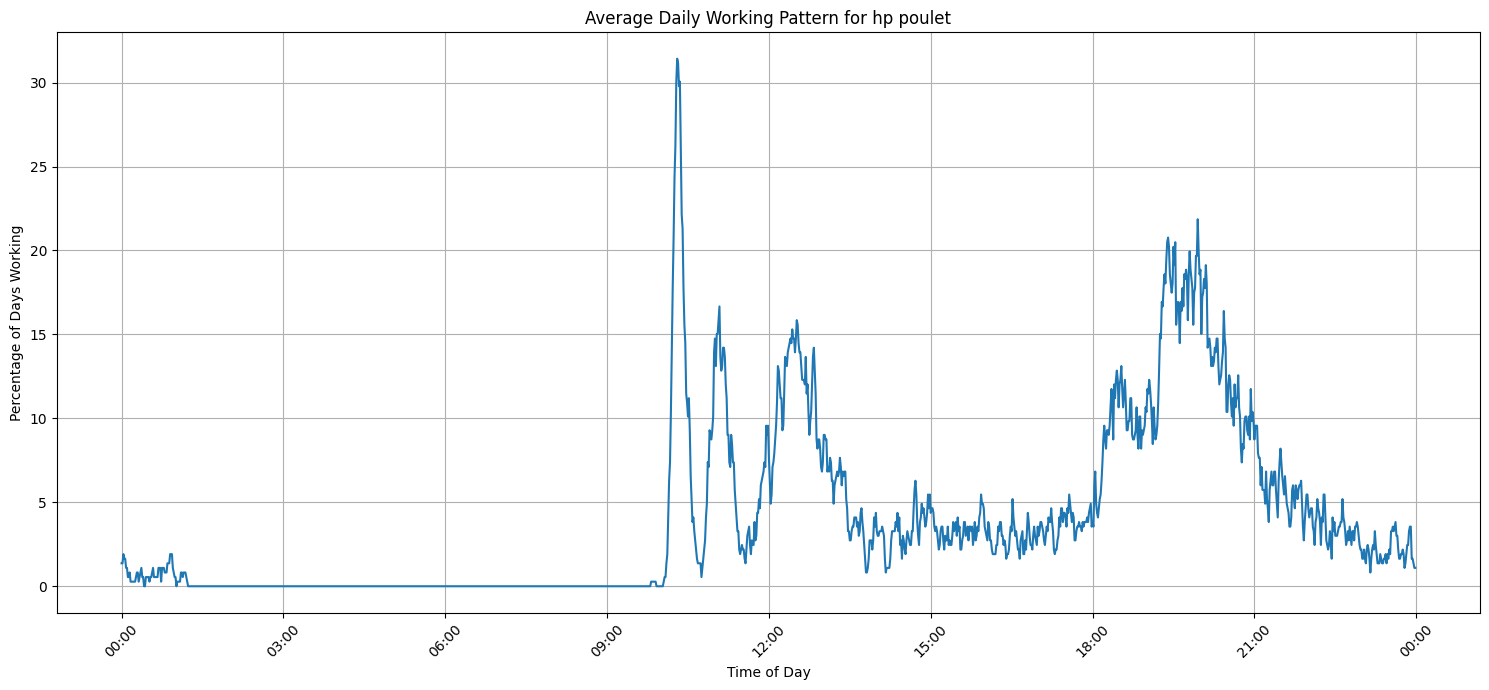

In [88]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot(times, minute_summary * 100, label='Percentage Working')
plt.title('Average Daily Working Pattern for hp poulet')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Days Working')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the x-axis to show time only
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
poulet = [friteuse_poulet_3,friteuse_poulet_4,friteuse_poulet_5]
minute_p = np.zeros((3, 1440))  # Assuming there are 1440 minutes in a day

for i in range(3):
    data = poulet[i]
    data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('datetime', inplace=True)
    data.drop(['Date', 'Time'], axis=1, inplace=True)
    
    # Extract only the 'working' column, resample to every minute if needed
    data_resampled = data['working'].resample('T').max().fillna(0)
    
    # Group by each day, and create a minute-by-minute pattern
    minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()
    minute_p[i, :] = minute_by_minute.values
        
minute_summary = minute_p.sum(axis=0)
times = pd.to_datetime(minute_by_minute.index.astype(str))



/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2900933414.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2900933414.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2900933414.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2900933414.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify

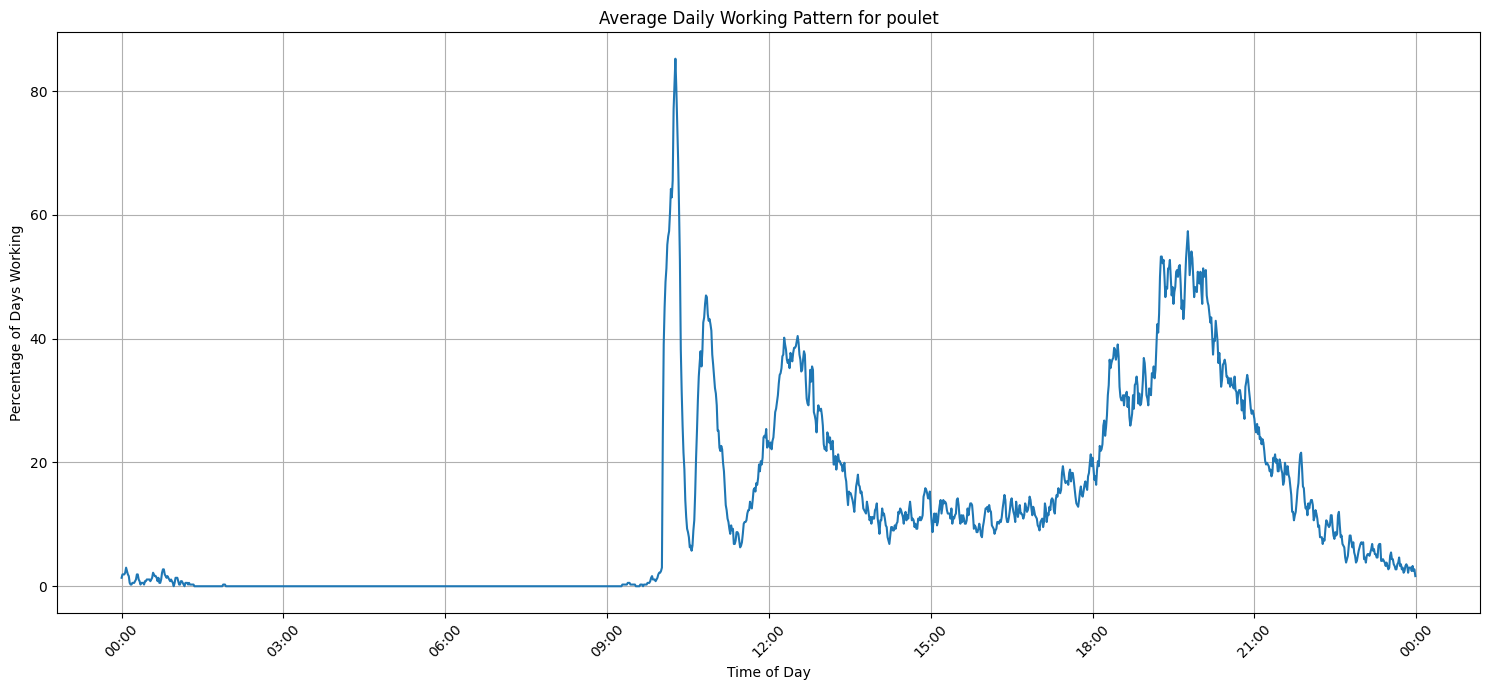

In [30]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot(times, minute_summary * 100, label='Percentage Working')
plt.title('Average Daily Working Pattern for poulet')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Days Working')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the x-axis to show time only
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
799 + 7*24*60

10879

# Experiment with data in one week

/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/1277928634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e["datetime"] = pd.to_datetime(data_e['Date'] + ' ' + data_e['Time'])
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/1277928634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e.drop(['Date', 'Time'], axis=1, inplace=True)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/1277928634.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  d

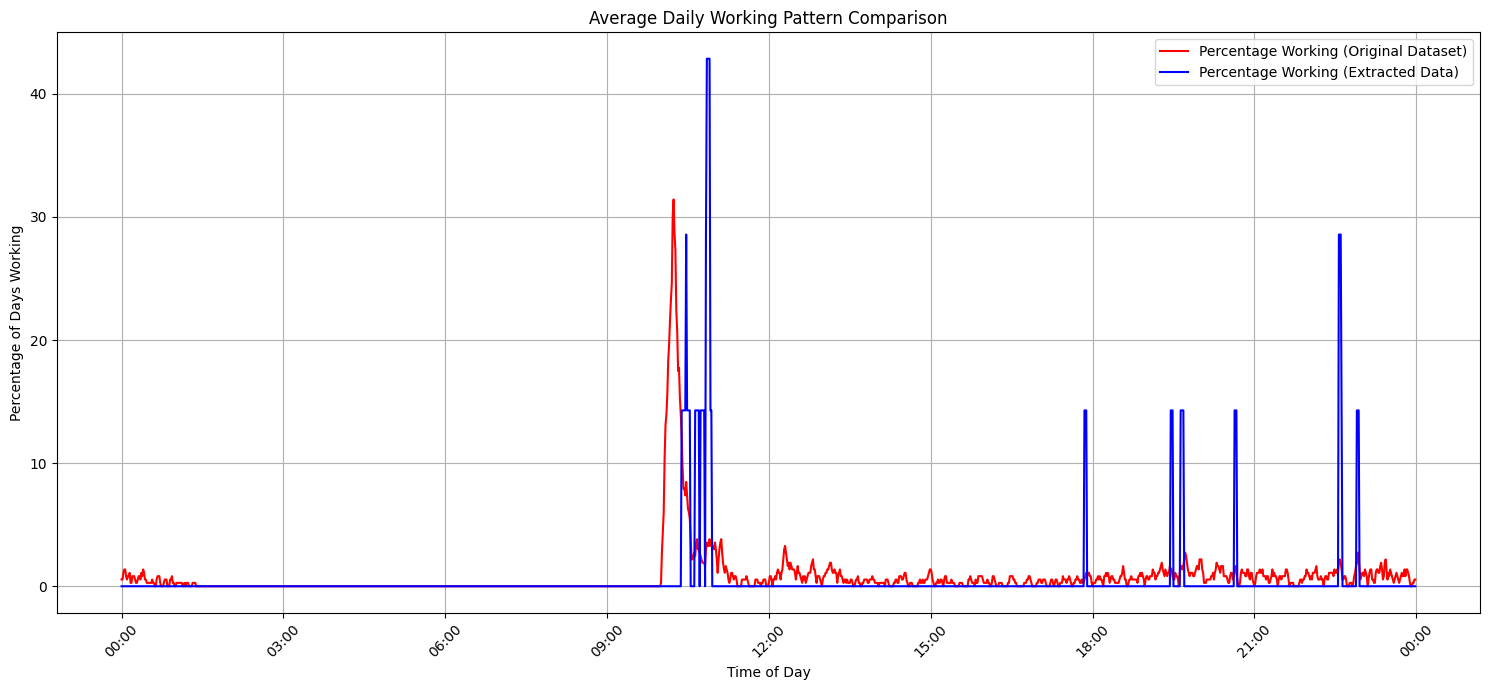

In [41]:
# friteuse fish machine

# extract data from index 799 to 10879
data_e = friteuse_fish.loc[799:10879,:]
data_e["datetime"] = pd.to_datetime(data_e['Date'] + ' ' + data_e['Time'])
data_e.set_index('datetime', inplace=True)
data_e.drop(['Date', 'Time'], axis=1, inplace=True)

# Extract only the 'working' column, resample to every minute if needed
data_resampled_e = data_e['working'].resample('T').max().fillna(0)

# Group by each day, and create a minute-by-minute pattern
minute_by_minute_e = data_resampled_e.groupby(data_resampled_e.index.time).mean()

times_e = pd.to_datetime(minute_by_minute_e.index.astype(str))



data = friteuse_fish
data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.set_index('datetime', inplace=True)
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Extract only the 'working' column, resample to every minute if needed
data_resampled = data['working'].resample('T').max().fillna(0)

# Group by each day, and create a minute-by-minute pattern
minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()

times = pd.to_datetime(minute_by_minute.index.astype(str))



plt.figure(figsize=(15, 7))
plt.plot(times, minute_by_minute.values * 100, 
         label='Percentage Working (Original Dataset)', color='red')
plt.plot(times_e, minute_by_minute_e.values * 100, 
         label='Percentage Working (Extracted Data)', color='blue')
plt.title('Average Daily Working Pattern Comparison')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Days Working')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the x-axis to show time only
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
# friteuse frites machine

friteuse = [friteuse_frites_1, friteuse_frites_2, friteuse_frites_3]
minute_f = np.zeros((3, 1440))  # Assuming there are 1440 minutes in a day
minute_fo = np.zeros((3,1440))
# Define the range of indices you want to extract
start_index = 799
end_index = 10879

for i in range(3):
    data = friteuse[i]
    data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('datetime', inplace=True)
    data.drop(['Date', 'Time'], axis=1, inplace=True)
    
    # Slice the data using predefined indices
    data_sliced = data.iloc[start_index:end_index]
    
    # Extract only the 'working' column, resample to every minute if needed
    data_resampled = data_sliced['working'].resample('T').max().fillna(0)
    data_origin = data['working'].resample('T').max().fillna(0)
    
    # Group by each day, and create a minute-by-minute pattern
    minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()
    minute_f[i, :] = minute_by_minute.values
    
    minute_by_minute_origin = data_origin.groupby(data_origin.index.time).mean()
    minute_fo[i,:] = minute_by_minute_origin.values

# Summarizing the working patterns across machines
minute_summary = minute_f.sum(axis=0)
minute_origin = minute_fo.sum(axis = 0)
times = pd.to_datetime(minute_by_minute.index.astype(str))
times_o = pd.to_datetime(minute_by_minute_origin.index.astype(str))



/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2283832394.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data_sliced['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2283832394.py:21: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_origin = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2283832394.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data_sliced['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/2283832394.py:21: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_origin = data['working'].resample('T').max().fillna(0)


# For the machine friteuse frites

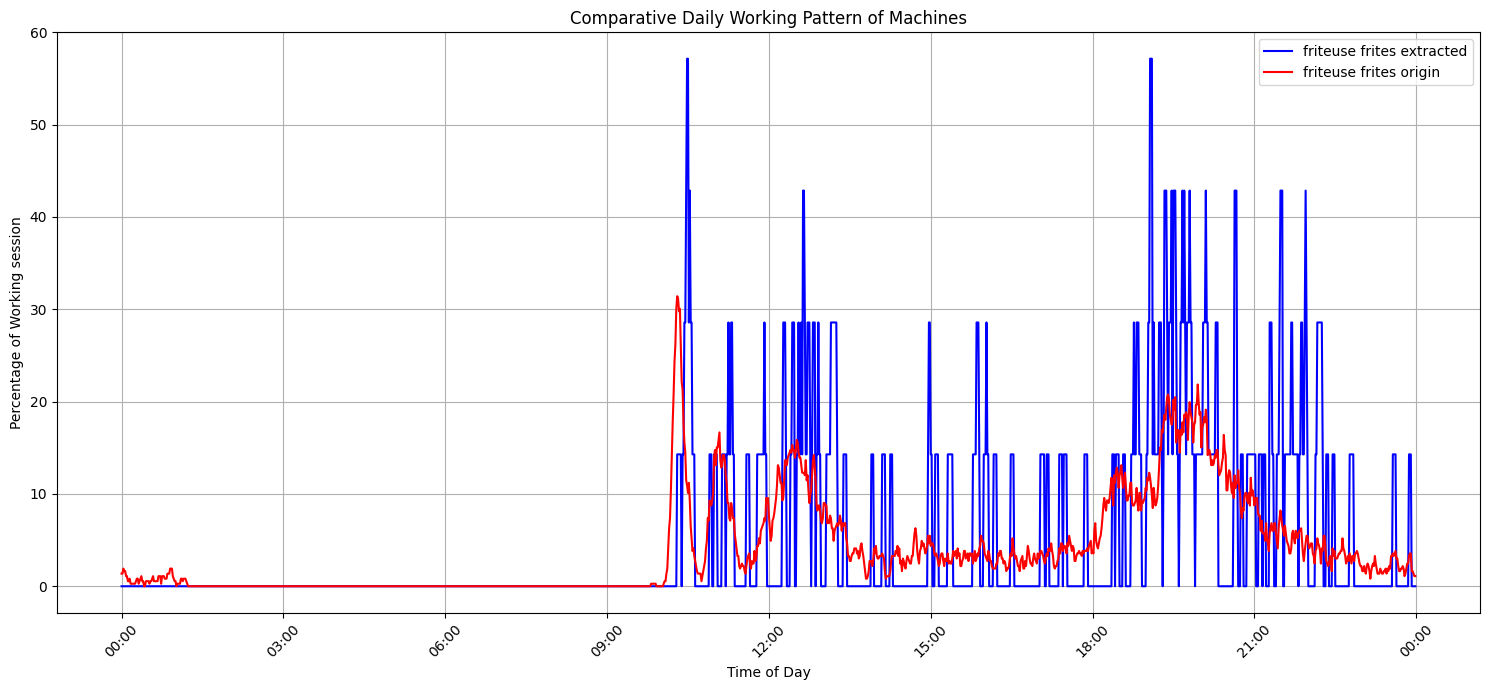

In [65]:

# Plotting
plt.figure(figsize=(15, 7))
colors = ['red', 'green', 'blue']  # Different color for each dataset
plt.plot(times, minute_summary * 100, label='friteuse frites extracted', color='blue')
plt.plot(times_o, minute_origin * 100, label='friteuse frites origin', color='red')
plt.title('Comparative Daily Working Pattern of Machines')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Working session')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the x-axis to show time only
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# make the plot smoother

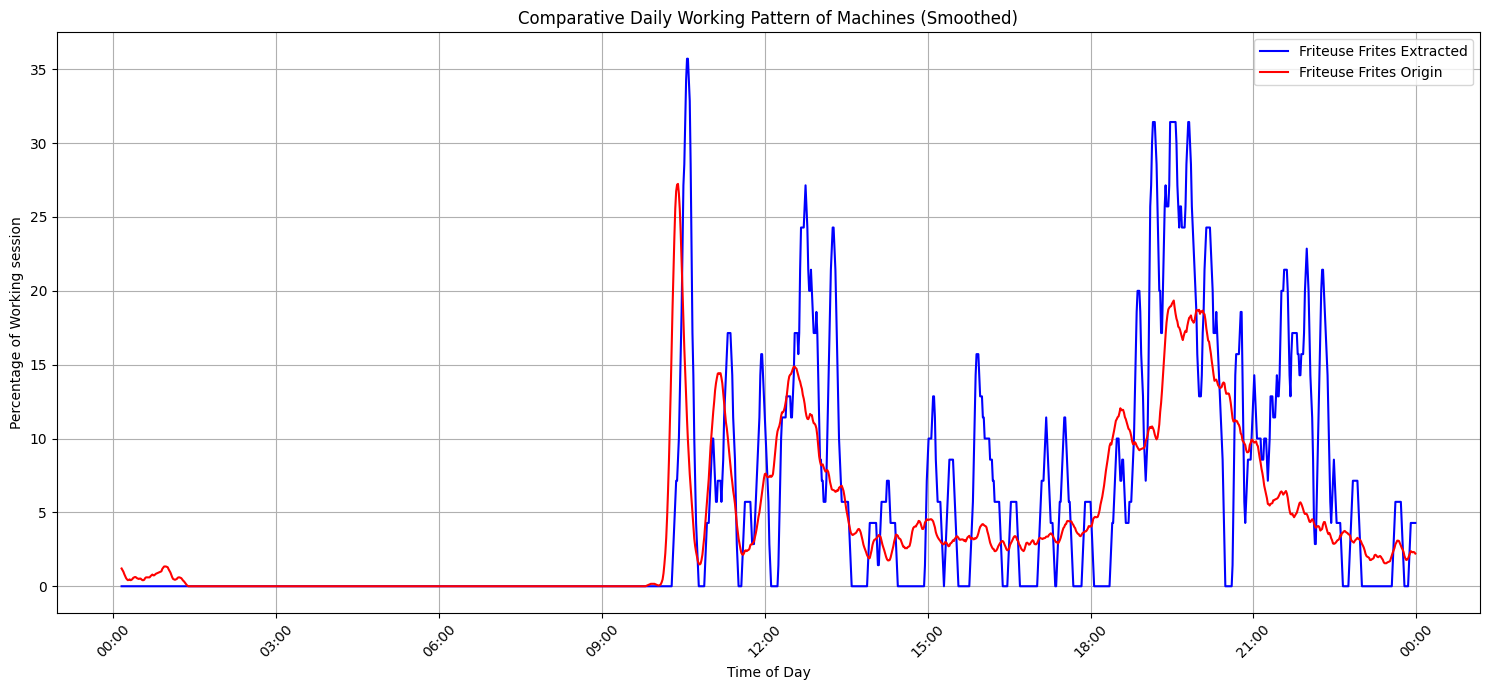

In [64]:

# Function to apply moving average smoothing
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

# Apply moving average to the summarized data
window_size = 10  
smoothed_summary = moving_average(minute_summary * 100, window_size)
smoothed_origin = moving_average(minute_origin * 100, window_size)

# Adjust 'times' to match the length of the smoothed data
adjusted_times = times[window_size-1:]  

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(adjusted_times, smoothed_summary, label='Friteuse Frites Extracted', color='blue')
plt.plot(adjusted_times, smoothed_origin, label='Friteuse Frites Origin', color='red')
plt.title('Comparative Daily Working Pattern of Machines (Smoothed)')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Working session')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# for the machine hp poulet

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

hp_poulet = [friteuse_hp_poulet_1, friteuse_hp_poulet_2]
minute_h = np.zeros((2, 1440))  # Adjusted to 2, as there are only two datasets in hp_poulet
minute_ho = np.zeros((2, 1440))  # For storing original data patterns

# Define the range of indices you want to extract
start_index = 799
end_index = 10879

for i in range(2):
    data = hp_poulet[i]
    data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('datetime', inplace=True)
    data.drop(['Date', 'Time'], axis=1, inplace=True)
    
    # Slice the data using predefined indices
    data_sliced = data.iloc[start_index:end_index]
    
    # Extract only the 'working' column, resample to every minute if needed
    data_resampled = data_sliced['working'].resample('T').max().fillna(0)
    data_origin = data['working'].resample('T').max().fillna(0)
    
    # Group by each day, and create a minute-by-minute pattern
    minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()
    minute_by_minute_origin = data_origin.groupby(data_origin.index.time).mean()
    
    minute_h[i, :] = minute_by_minute.values
    minute_ho[i, :] = minute_by_minute_origin.values

# Summarizing the working patterns across machines
minute_summary = minute_h.sum(axis=0)
minute_origin = minute_ho.sum(axis=0)
times = pd.to_datetime(minute_by_minute.index.astype(str))
times_o = pd.to_datetime(minute_by_minute_origin.index.astype(str))



/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/3422810587.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data_sliced['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/3422810587.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_origin = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/3422810587.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data_sliced['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/3422810587.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_origin = data['working'].resample('T').max().fillna(0)


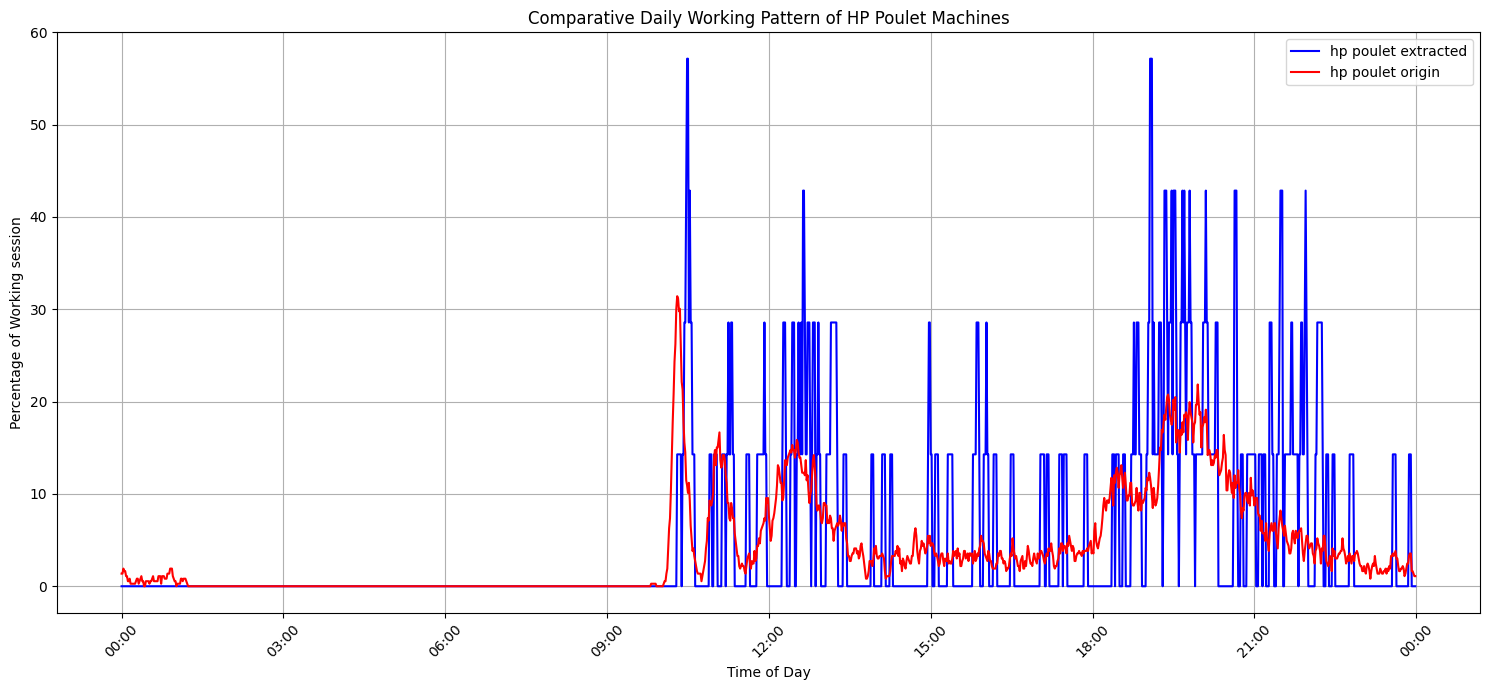

In [63]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot(times, minute_summary * 100, label='hp poulet extracted', color='blue')
plt.plot(times_o, minute_origin * 100, label='hp poulet origin', color='red')
plt.title('Comparative Daily Working Pattern of HP Poulet Machines')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Working session')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


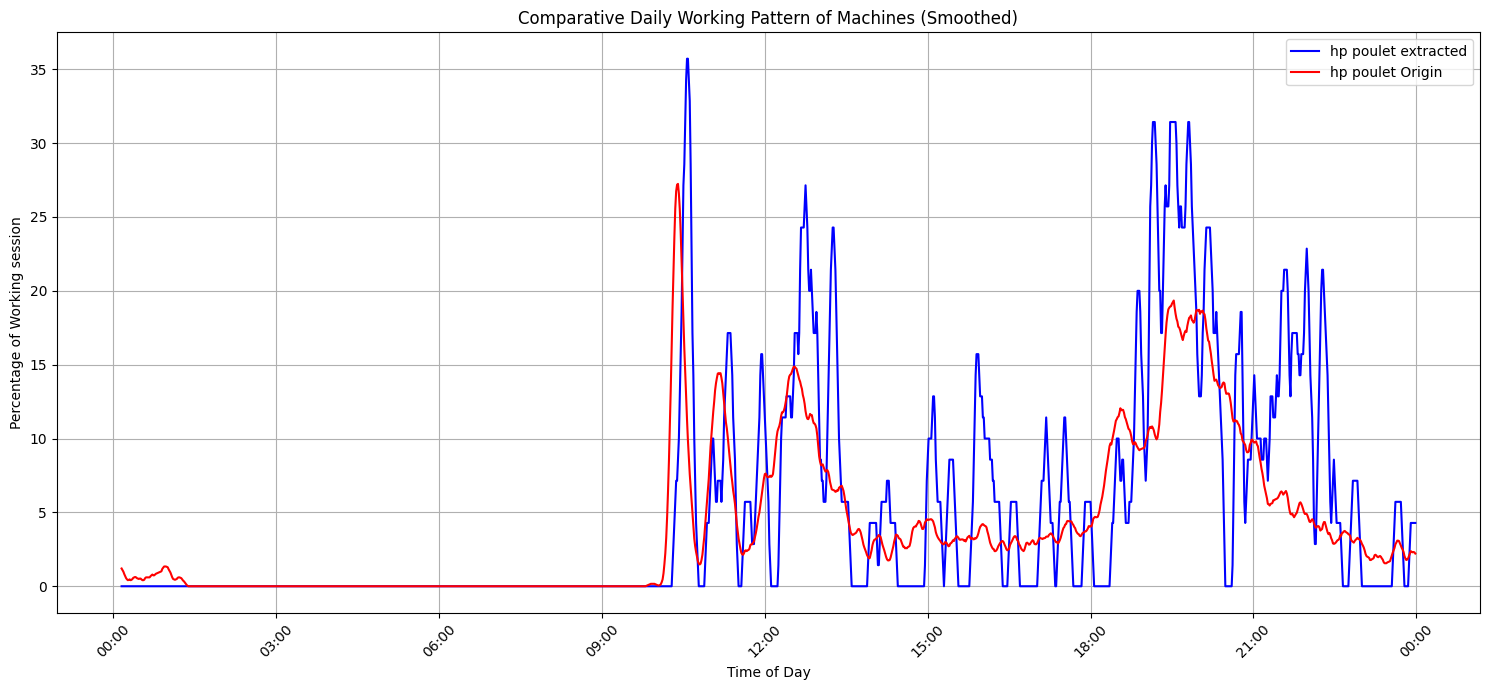

In [62]:

# Apply moving average to the summarized data
window_size = 10  
smoothed_summary = moving_average(minute_summary * 100, window_size)
smoothed_origin = moving_average(minute_origin * 100, window_size)

# Adjust 'times' to match the length of the smoothed data
adjusted_times = times[window_size-1:]  

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(adjusted_times, smoothed_summary, label='hp poulet extracted', color='blue')
plt.plot(adjusted_times, smoothed_origin, label='hp poulet Origin', color='red')
plt.title('Comparative Daily Working Pattern of Machines (Smoothed)')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Working session')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# frteuse poulet

In [67]:
poulet = [friteuse_poulet_3, friteuse_poulet_4, friteuse_poulet_5]
minute_p = np.zeros((3, 1440))  # Assuming there are 1440 minutes in a day
minute_po = np.zeros((3, 1440))  # For storing original data patterns

# Define the range of indices you want to extract
start_index = 799
end_index = 10879

for i in range(3):
    data = poulet[i]
    data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('datetime', inplace=True)
    data.drop(['Date', 'Time'], axis=1, inplace=True)
    
    # Slice the data using predefined indices
    data_sliced = data.iloc[start_index:end_index]
    
    # Extract only the 'working' column, resample to every minute if needed
    data_resampled = data_sliced['working'].resample('T').max().fillna(0)
    data_origin = data['working'].resample('T').max().fillna(0)
    
    # Group by each day, and create a minute-by-minute pattern
    minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()
    minute_by_minute_origin = data_origin.groupby(data_origin.index.time).mean()
    
    minute_p[i, :] = minute_by_minute.values
    minute_po[i, :] = minute_by_minute_origin.values

# Summarizing the working patterns across machines
minute_summary = minute_p.sum(axis=0)
minute_origin = minute_po.sum(axis=0)
times = pd.to_datetime(minute_by_minute.index.astype(str))
times_o = pd.to_datetime(minute_by_minute_origin.index.astype(str))



/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/3782514249.py:19: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data_sliced['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/3782514249.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_origin = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/3782514249.py:19: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data_sliced['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/3782514249.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_origin = data['working'].resample('T').max().fillna(0)


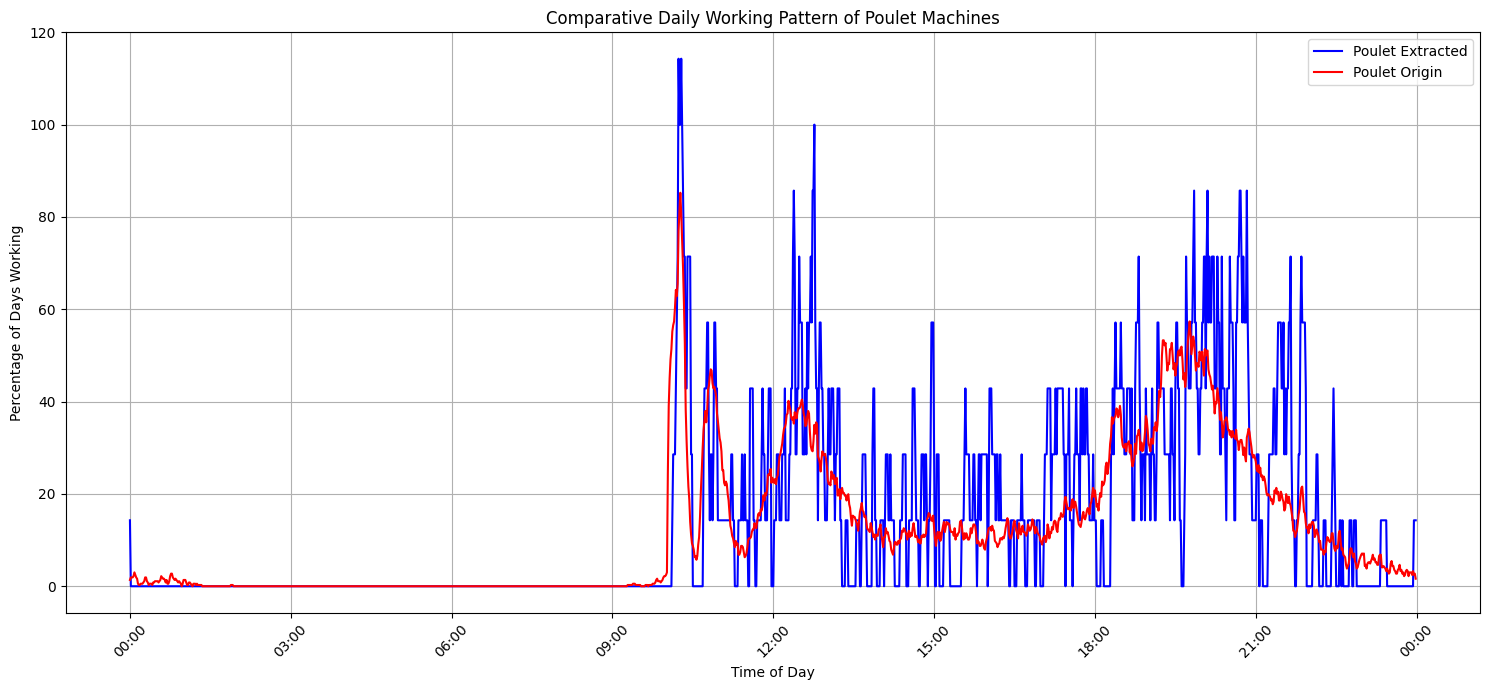

In [68]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot(times, minute_summary * 100, label='Poulet Extracted', color='blue')
plt.plot(times_o, minute_origin * 100, label='Poulet Origin', color='red')
plt.title('Comparative Daily Working Pattern of Poulet Machines')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Days Working')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Smooth the plot

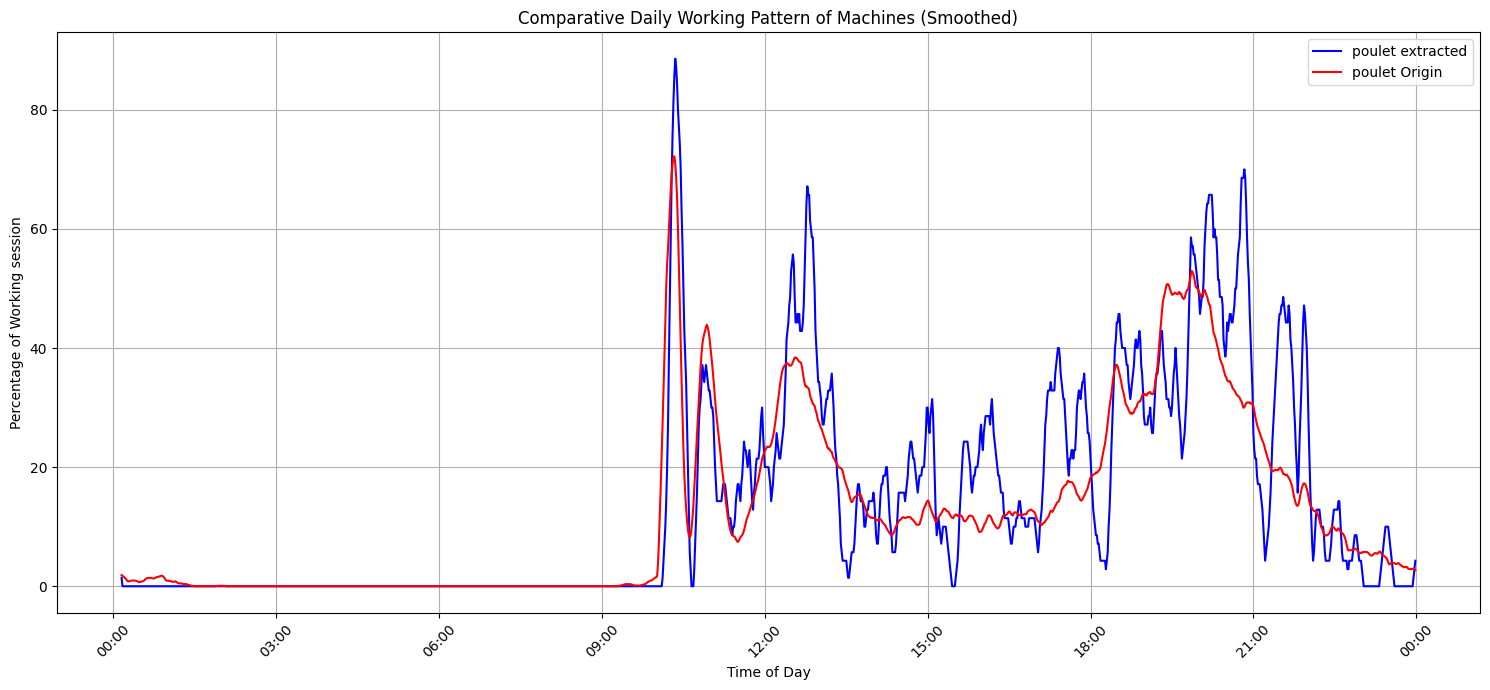

In [70]:
# Apply moving average to the summarized data
window_size = 10  
smoothed_summary = moving_average(minute_summary * 100, window_size)
smoothed_origin = moving_average(minute_origin * 100, window_size)

# Adjust 'times' to match the length of the smoothed data
adjusted_times = times[window_size-1:]  

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(adjusted_times, smoothed_summary, label='poulet extracted', color='blue')
plt.plot(adjusted_times, smoothed_origin, label='poulet Origin', color='red')
plt.title('Comparative Daily Working Pattern of Machines (Smoothed)')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Working session')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# The extracted data has the same trend with overall performance we get

During the working session:
friteuse fish is at a working power of 15kw
frites is at a working power of 16kw
hp poulet is at a working power of 17kw
poulet is at a working power of 16.5kw

In [91]:
data = friteuse_fish
data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.set_index('datetime', inplace=True)
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Extract only the 'working' column, resample to every minute if needed
data_resampled = data['working'].resample('T').max().fillna(0)

# Group by each day, and create a minute-by-minute pattern
fish_minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()

#####################################################
#####################################################

friteuse = [friteuse_frites_1,friteuse_frites_2,friteuse_frites_3]
minute_f = np.zeros((3, 1440))  # Assuming there are 1440 minutes in a day

for i in range(3):
    data = friteuse[i]
    data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('datetime', inplace=True)
    data.drop(['Date', 'Time'], axis=1, inplace=True)
    
    # Extract only the 'working' column, resample to every minute if needed
    data_resampled = data['working'].resample('T').max().fillna(0)
    
    # Group by each day, and create a minute-by-minute pattern
    minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()
    minute_f[i, :] = minute_by_minute.values
        
frites_minute_summary = minute_f.sum(axis=0)

#####################################################
#####################################################

hp_poulet = [friteuse_hp_poulet_1,friteuse_hp_poulet_2]
minute_h = np.zeros((3, 1440))  # Assuming there are 1440 minutes in a day

for i in range(2):
    data = hp_poulet[i]
    data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('datetime', inplace=True)
    data.drop(['Date', 'Time'], axis=1, inplace=True)
    
    # Extract only the 'working' column, resample to every minute if needed
    data_resampled = data['working'].resample('T').max().fillna(0)
    
    # Group by each day, and create a minute-by-minute pattern
    minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()
    minute_h[i, :] = minute_by_minute.values
        
hp_poulet_minute_summary = minute_h.sum(axis=0)
#####################################################
#####################################################
poulet = [friteuse_poulet_3,friteuse_poulet_4,friteuse_poulet_5]
minute_p = np.zeros((3, 1440))  # Assuming there are 1440 minutes in a day

for i in range(3):
    data = poulet[i]
    data["datetime"] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('datetime', inplace=True)
    data.drop(['Date', 'Time'], axis=1, inplace=True)
    
    # Extract only the 'working' column, resample to every minute if needed
    data_resampled = data['working'].resample('T').max().fillna(0)
    
    # Group by each day, and create a minute-by-minute pattern
    minute_by_minute = data_resampled.groupby(data_resampled.index.time).mean()
    minute_p[i, :] = minute_by_minute.values
        
poulet_minute_summary = minute_p.sum(axis=0)






/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/4237574308.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/4237574308.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/4237574308.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_68641/4237574308.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data['working'].resample('T').max().fillna(0)
/var/fold

In [92]:
energy_fish = fish_minute_by_minute.sum()
print(energy_fish)
energy_frites = frites_minute_summary.sum()
print(energy_frites)
energy_hp_poulet = hp_poulet_minute_summary.sum()
print(energy_hp_poulet)
energy_poulet = poulet_minute_summary.sum()
print(energy_poulet)

11.434575941312975
201.86915188262597
57.93191107118796
178.6459315817052


In [97]:
energy_fish = fish_minute_by_minute.sum() * 15 / 60
energy_frites = frites_minute_summary.sum() * 16 / 60
energy_hp_poulet = hp_poulet_minute_summary.sum() * 17 / 60
energy_poulet = poulet_minute_summary.sum() * 16.5 / 60

In [98]:
energy_total = (energy_fish+energy_frites+energy_hp_poulet+energy_poulet) * 365

In [99]:
energy_total

44614.71302367942

In [100]:
cost = energy_total * 0.27
print( "total cost in the way we recommend: ", cost)

total cost in the way we recommend:  12045.972516393444


In [101]:
# real data
fish = (5.92) *1000
frites = (29.05)*1000
hp_poulet = (15.06)*1000
poulet = (33.05)*1000

origin_energy = fish+frites+hp_poulet+poulet
origin_expense = origin_energy*0.27

In [102]:
print("origin expense:", origin_expense)
print("recommended expense; ", cost)
print("saved amount", origin_expense - cost)

origin expense: 22431.600000000002
recommended expense;  12045.972516393444
saved amount 10385.627483606559
